# Install the bse library

## USE pip

In [2]:
pip install bsedata

Note: you may need to restart the kernel to use updated packages.


# Code goes here :BaseException

In [12]:
import random
import time
import pytest
import datetime
from bsedata.bse import BSE
from bsedata.exceptions import InvalidStockException, BhavCopyNotFound

b = BSE(update_codes=True)


@pytest.fixture(autouse=True)
def slow_tests():
    time.sleep(1)


def test_str():
    assert str(b) == "Driver Class for Bombay Stock Exchange (BSE)"


def test_repr():
    assert (
        repr(b)
        == "<BSE: update_codes=True> Driver Class for Bombay Stock Exchange (BSE)"
    )


@pytest.mark.parametrize("scripCode", ["534976", "500116", "512573", "500084"])
def test_getQuote_valid(scripCode):
    data = b.getQuote(scripCode)
    if "priceBand" not in data.keys():
        assert len(data) == 24
    else:
        assert len(data) == 27

    time.sleep(0.5)


def test_getQuote_invalid_default():
    with pytest.raises(InvalidStockException) as err_info:
        b.getQuote("513715")

    assert err_info.value.status == "Inactive stock"


def test_getQuote_invalid_custom():
    with pytest.raises(InvalidStockException) as err_info:
        b.getQuote("538936")

    assert err_info.value.status == "Suspended due to Procedural reasons"


@pytest.mark.parametrize(
    "scrip_code,scrip_name",
    [
        ("534976", "V-MART RETAIL LTD."),
        ("542649", "Rail Vikas Nigam Ltd"),
        ("541557", "Fine Organic Industries Ltd"),
    ],
)
def test_verifyCode_valid(scrip_code, scrip_name):
    assert b.verifyScripCode(scrip_code) == scrip_name


def test_verifyCode_invalid():
    assert b.verifyScripCode("534980") == None


def test_getIndices():
    all_categories = [
        "market_cap/broad",
        "sector_and_industry",
        "thematics",
        "strategy",
        "sustainability",
        "volatility",
        "composite",
        "government",
        "corporate",
        "money_market",
    ]

    test_categories = random.choices(all_categories, k=3)

    for category in test_categories:
        try:
            print(f"\nChecking indices for: {category}")
            indices = b.getIndices(category)
            datetime.datetime.strptime(indices["updatedOn"], "%d %b %Y")
            assert len(indices["indices"]) >= 1
            time.sleep(1)
        except Exception as e:
            print(e)


def test_getBhavCopyData_on_trade_holiday():
    with pytest.raises(BhavCopyNotFound):
        b.getBhavCopyData(datetime.date(2024, 1, 26))


def test_getBhavCopyData():
    bhavCopy = b.getBhavCopyData(datetime.date(2024, 1, 25))

    scripCodeTypes = {x["scripType"] for x in bhavCopy}

    predefinedScripCodeTypes = {"equity", "debenture", "preference", "bond"}

    assert scripCodeTypes == predefinedScripCodeTypes

    assert len(bhavCopy) > 0


def test_topGainers():
    topGainers = b.topGainers()

    assert len(topGainers) <= 5


def test_topLosers():
    topLosers = b.topLosers()

    assert len(topLosers) <= 5

print(b)

Driver Class for Bombay Stock Exchange (BSE)


In [12]:
import pandas as pd
from pprint import pp
# q = b.getQuote('534976')
# print(q)
# q = b.getQuote('500084')
# print(q)
q = b.getQuote('500164')
pp(q)
# df = pd.DataFrame(q)
# print(df)

{'companyName': 'GODREJ INDUSTRIES LTD.',
 'currentValue': '798.95',
 'change': '-23.35',
 'pChange': '-2.84',
 'updatedOn': '21 Jun 24 | 04:01 PM',
 'securityID': 'GODREJIND',
 'scripCode': '500164',
 'group': 'A  / BSE 500',
 'faceValue': '1.00',
 'industry': 'Diversified',
 'previousClose': '822.30',
 'previousOpen': '830.00',
 'dayHigh': '830.50',
 'dayLow': '795.50',
 '52weekHigh': '989.90',
 '52weekLow': '469.00',
 'weightedAvgPrice': '812.11',
 'totalTradedValue': '1.31 Cr.',
 'totalTradedQuantity': '0.16 Lakh',
 '2WeekAvgQuantity': '0.13 Lakh',
 'marketCapFull': '26,899.91 Cr.',
 'marketCapFreeFloat': '5,110.98 Cr.',
 'buy': {'1': {'quantity': '-', 'price': '0.00'},
         '2': {'quantity': '-', 'price': '0.00'},
         '3': {'quantity': '-', 'price': '0.00'},
         '4': {'quantity': '-', 'price': '0.00'},
         '5': {'quantity': '-', 'price': '0.00'}},
 'sell': {'1': {'price': '0.00', 'quantity': '-'},
          '2': {'price': '0.00', 'quantity': '-'},
          '3':

In [13]:
top_gainers = b.topGainers()
pp(top_gainers)

[{'securityID': 'TIMETECHNO',
  'scripCode': '532856',
  'LTP': '336.50',
  'change': '39.40',
  'pChange': '13.26'},
 {'securityID': 'GRAVITA',
  'scripCode': '533282',
  'LTP': '1,541.00',
  'change': '164.85',
  'pChange': '11.98'},
 {'securityID': 'CERA',
  'scripCode': '532443',
  'LTP': '9,134.85',
  'change': '852.00',
  'pChange': '10.29'},
 {'securityID': 'RAILTEL',
  'scripCode': '543265',
  'LTP': '476.20',
  'change': '41.80',
  'pChange': '9.62'},
 {'securityID': 'HLEGLAS',
  'scripCode': '522215',
  'LTP': '481.80',
  'change': '31.00',
  'pChange': '6.88'}]


In [14]:

top_losers = b.topLosers()
pp(top_losers)

[{'securityID': 'PARADEEP',
  'scripCode': '543530',
  'LTP': '85.38',
  'change': '-6.90',
  'pChange': '-7.48'},
 {'securityID': 'CHAMBLFERT',
  'scripCode': '500085',
  'LTP': '517.05',
  'change': '-41.45',
  'pChange': '-7.42'},
 {'securityID': 'RCF',
  'scripCode': '524230',
  'LTP': '207.45',
  'change': '-14.95',
  'pChange': '-6.72'},
 {'securityID': 'GRSE',
  'scripCode': '542011',
  'LTP': '1,645.15',
  'change': '-115.70',
  'pChange': '-6.57'},
 {'securityID': 'NFL',
  'scripCode': '523630',
  'LTP': '141.00',
  'change': '-9.85',
  'pChange': '-6.53'}]


In [11]:
from pprint import pp
pp(b.getScripCodes())
# print(b.getScripCodes())

{'500002': 'ABB India Limited',
 '500003': 'AEGIS LOGISTICS LTD.',
 '500008': 'AMARA RAJA BATTERIES LTD.',
 '500009': 'AMBALAL SARABHAI ENTERPRISES LTD.',
 '500010': 'HOUSING DEVELOPMENT FINANCE CORP.LTD.',
 '500012': 'ANDHRA PETROCHEMICALS LTD.',
 '500013': 'ANSAL PROPERTIES & INFRASTRUCTURE LTD.',
 '500014': 'Utique Enterprises Ltd',
 '500016': 'ARUNA HOTELS LTD.',
 '500020': 'BOMBAY DYEING & MFG.CO.LTD.',
 '500023': 'Asian Hotels (North) Limited',
 '500024': 'Assam Company (India) Limited',
 '500027': 'ATUL LTD.',
 '500028': 'ATV PROJECTS INDIA LTD.',
 '500029': 'AUTOLITE (INDIA) LTD.',
 '500030': 'AUTORIDERS FINANCE LTD.',
 '500031': 'BAJAJ ELECTRICALS LTD.',
 '500032': 'Bajaj Hindusthan Sugar Limited',
 '500033': 'FORCE MOTORS LTD.',
 '500034': 'Bajaj Finance Limited',
 '500038': 'BALRAMPUR CHINI MILLS LTD.',
 '500039': 'BANCO PRODUCTS (INDIA) LTD.',
 '500040': 'CENTURY TEXTILES & INDUSTRIES LTD.',
 '500041': 'BANNARI AMMAN SUGARS LTD.',
 '500042': 'BASF INDIA LTD.',
 '500043': 'B

    currentValue   change pChange scripFlag                             name
0       77209.90  -269.03   -0.35        16                       BSE SENSEX
1       24690.80   -93.83   -0.38        98                    BSE SENSEX 50
2       81458.19  -563.32   -0.69        99               BSE SENSEX Next 50
3       24911.11  -110.15   -0.44        22                          BSE 100
4        8818.50   -56.25   -0.63       100              BSE Bharat 22 Index
5       45967.07  -119.46   -0.26        81                       BSE MidCap
6       51936.53   +30.04    0.06        82                     BSE SmallCap
7       10923.97   -44.40   -0.40        23                          BSE 200
8       15668.33   -28.58   -0.18       102             BSE 150 MidCap Index
9        6883.36    -6.49   -0.09       103           BSE 250 SmallCap Index
10      10391.78   -40.84   -0.39       104        BSE 250 LargeMidCap Index
11      11901.79   -18.37   -0.15       105        BSE 400 MidSmallCap Index

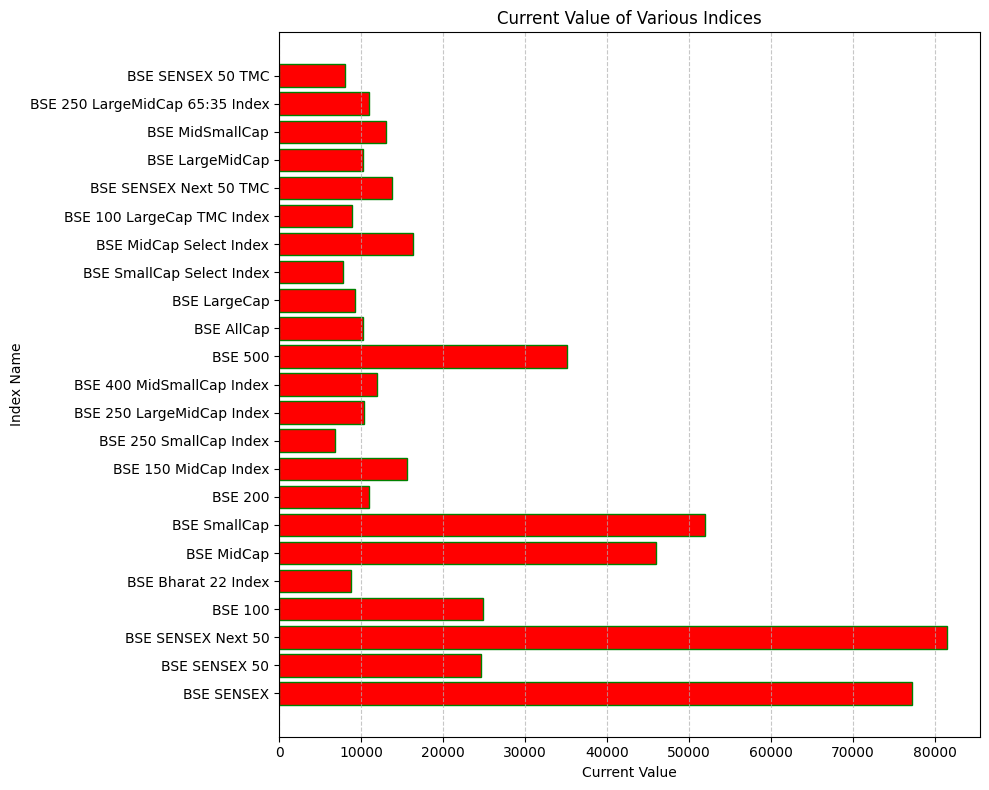

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from bsedata.bse import BSE
from bsedata.exceptions import InvalidStockException, BhavCopyNotFound

b = BSE(update_codes=True)
q = b.getIndices('market_cap/broad')['indices']
# print(q)
df = pd.DataFrame(q)
# print(df)
df['currentValue'] = df['currentValue'].str.replace(',','').astype(float)
print(df)
# Select relevant columns
df_selected = df[['currentValue', 'name']]

# Plot the data
plt.figure(figsize=(10, 8))
plt.barh(df_selected['name'], df_selected['currentValue'], color='r', edgecolor='green')
plt.xlabel('Current Value')
plt.ylabel('Index Name')
plt.title('Current Value of Various Indices')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()